Intercept (Bias): -0.6360488067468282
Coefficients: [0.65230576 0.93531312]


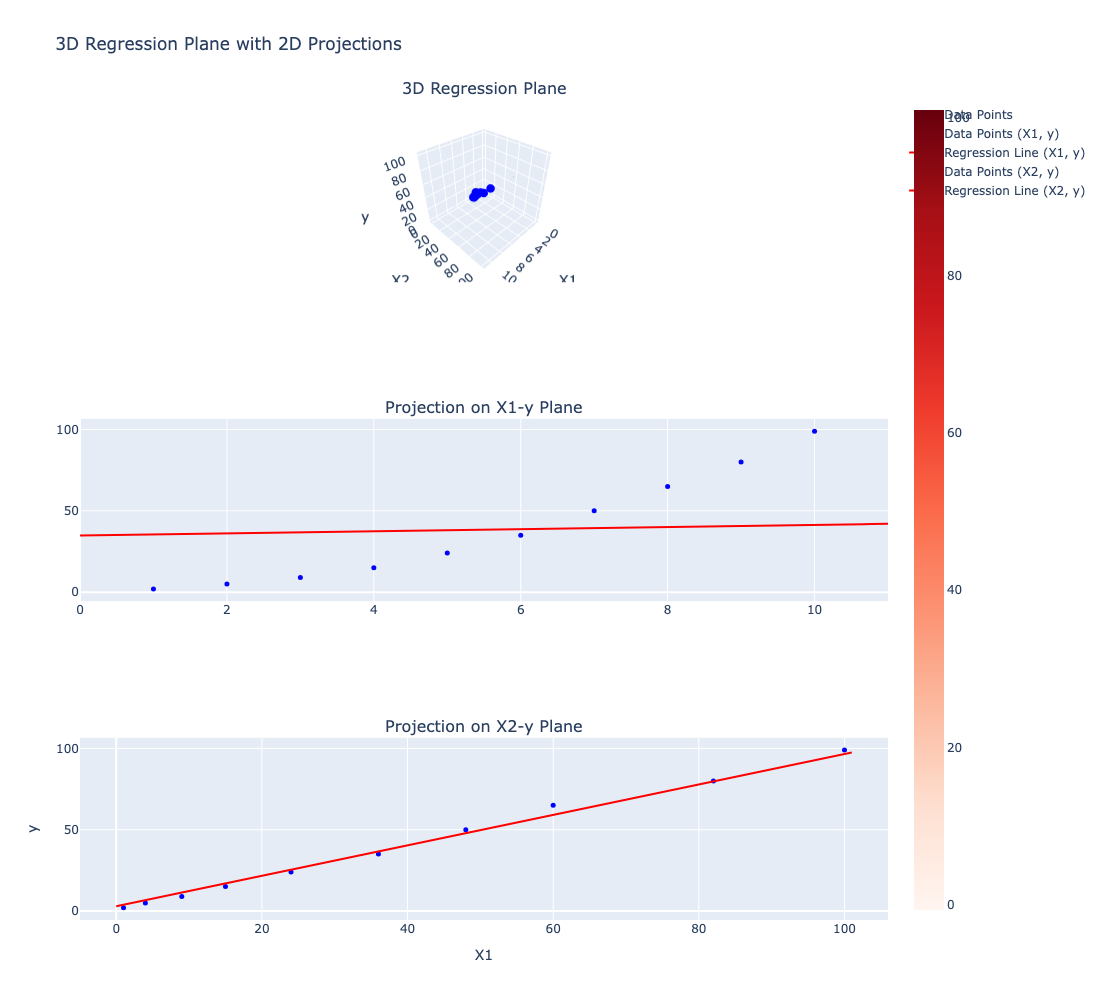

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Load your data
xl = pd.ExcelFile('nonlinear_data.xls')
df = pd.read_excel(xl, 1, header=0)

# Separate the features (X_train) and target (y_train)
X_train = df[['X1', 'X2']]
y_train = df['y']

# Create and fit a linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Print the intercept and coefficients of the model
print("Intercept (Bias):", regressor.intercept_)
print("Coefficients:", regressor.coef_)

# Create a mesh grid for plotting the regression plane
x1_range = np.linspace(X_train['X1'].min() - 1, X_train['X1'].max() + 1, 100)
x2_range = np.linspace(X_train['X2'].min() - 1, X_train['X2'].max() + 1, 100)
x1_mesh, x2_mesh = np.meshgrid(x1_range, x2_range)

# Predict using the linear regression model
y_mesh_pred = (regressor.intercept_ +
               regressor.coef_[0] * x1_mesh +
               regressor.coef_[1] * x2_mesh)

# Create a 3D scatter plot with the data points
scatter3d = go.Scatter3d(
    x=X_train['X1'],
    y=X_train['X2'],
    z=y_train,
    mode='markers',
    marker=dict(size=5, color='blue'),
    name='Data Points'
)

# Create the regression plane
plane = go.Surface(
    x=x1_range,
    y=x2_range,
    z=y_mesh_pred,
    colorscale='reds',
    opacity=0.5,
    name='Regression Plane'
)

# Create 2D projection plot for X1 vs y
scatter_x1_y = go.Scatter(
    x=X_train['X1'],
    y=y_train,
    mode='markers',
    marker=dict(size=5, color='blue'),
    name='Data Points (X1, y)'
)

# Create the regression line projection on X1 vs y
line_x1_y = go.Scatter(
    x=x1_range,
    y=regressor.intercept_ + regressor.coef_[0] * x1_range + regressor.coef_[1] * np.mean(X_train['X2']),
    mode='lines',
    line=dict(color='red'),
    name='Regression Line (X1, y)'
)

# Create 2D projection plot for X2 vs y
scatter_x2_y = go.Scatter(
    x=X_train['X2'],
    y=y_train,
    mode='markers',
    marker=dict(size=5, color='blue'),
    name='Data Points (X2, y)'
)

# Create the regression line projection on X2 vs y
line_x2_y = go.Scatter(
    x=x2_range,
    y=regressor.intercept_ + regressor.coef_[0] * np.mean(X_train['X1']) + regressor.coef_[1] * x2_range,
    mode='lines',
    line=dict(color='red'),
    name='Regression Line (X2, y)'
)

# Create a subplot with 3 rows: 1 for the 3D plot, 2 for the 2D projections
fig = make_subplots(
    rows=3, cols=1,
    specs=[[{'type': 'surface'}], [{'type': 'xy'}], [{'type': 'xy'}]],
    subplot_titles=('3D Regression Plane', 'Projection on X1-y Plane', 'Projection on X2-y Plane')
)

# Add the 3D plot to the first row
fig.add_trace(scatter3d, row=1, col=1)
fig.add_trace(plane, row=1, col=1)

# Add the X1-y projection to the second row
fig.add_trace(scatter_x1_y, row=2, col=1)
fig.add_trace(line_x1_y, row=2, col=1)

# Add the X2-y projection to the third row
fig.add_trace(scatter_x2_y, row=3, col=1)
fig.add_trace(line_x2_y, row=3, col=1)

# Update the layout for a broader view and better visuals
fig.update_layout(
    title='3D Regression Plane with 2D Projections',
    height=1000,
    scene=dict(
        xaxis_title='X1',
        yaxis_title='X2',
        zaxis_title='y',
        camera=dict(eye=dict(x=1.5, y=1.5, z=1.5))
    ),
    xaxis2=dict(title='X1'),
    yaxis2=dict(title='y'),
    xaxis3=dict(title='X2'),
    yaxis3=dict(title='y')
)

# Show the plot
fig.show()
